# Import Tools

In [16]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# Load the Dataset

In [17]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Processing

In [18]:

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.drop(columns = ['CustomerID'], axis = 1, inplace =True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Apply KMeans

# Elbo Method

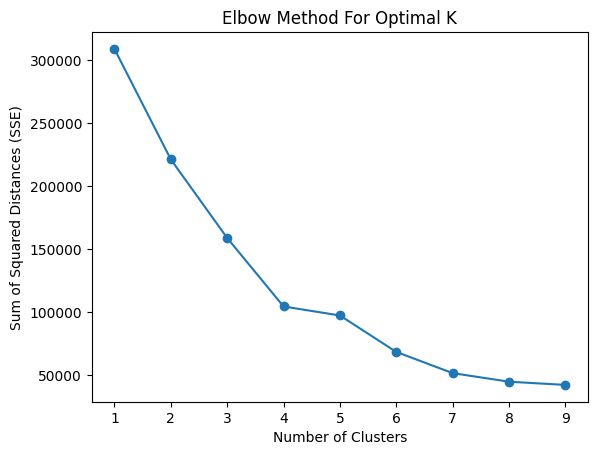

In [19]:
sse = []

k_range = range(1,10)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal K')
plt.show()

# Apply K Means with 3 cluster

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,2


# Generate Cluster Names

In [21]:
cluster_labels = {
    0: "Low Income - Low Spending",
    1: "High Income - High Spending",
    2: "Young Low Income - High Spending",
    }

df['segments'] = df['cluster'].map(cluster_labels)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,segments
0,1,19,15,39,2,Young Low Income - High Spending
1,1,21,15,81,2,Young Low Income - High Spending
2,0,20,16,6,0,Low Income - Low Spending
3,0,23,16,77,2,Young Low Income - High Spending
4,0,31,17,40,2,Young Low Income - High Spending


# Visualize Clusters

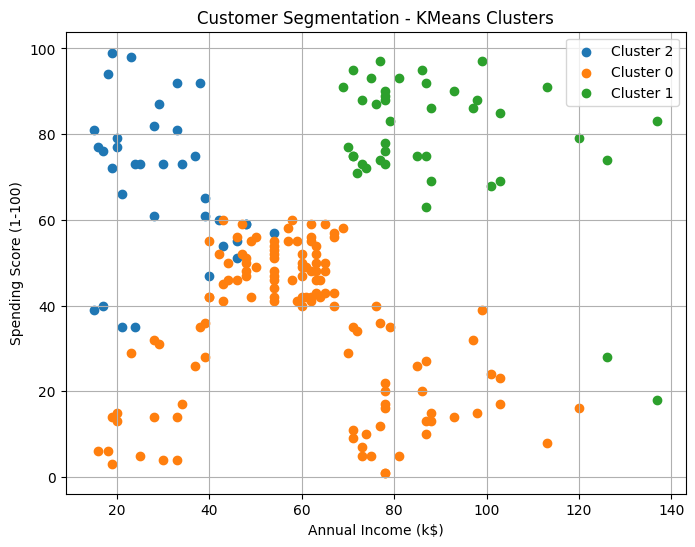

In [22]:

# Simple scatter plot
plt.figure(figsize=(8, 6))
for cluster in df['cluster'].unique():
    clustered = df[df['cluster'] == cluster]
    plt.scatter(clustered['Annual Income (k$)'], clustered['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation - KMeans Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Evalutae KMeans

In [23]:
features = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

silhouette_avg = silhouette_score(features, df['cluster'])
print(f"Silhouette Score: {silhouette_avg : 2f}")

Silhouette Score:  0.335452


# Save and Load trained Kmeans

In [24]:
import pickle

# pickle.dump(kmeans, open('kmeans.pkl','wb'))

kmeans = pickle.load(open('kmeans.pkl', 'rb'))

# Real Time Customer Segmentation Function

In [25]:
# Define cluster labels
cluster_labels = {
    0: "Low Income – Low Spending",
    1: "High Income – High Spending",
    2: "Young Low Income – High Spending"
}

def predict_customer_segment(gender, age, income, spending_score):
  new_data = np.array([[gender, age, income, spending_score]])

  cluster = kmeans.predict(new_data)[0]

  segment = cluster_labels.get(cluster, "Unknown Segment")

  print(f"Predicted Cluster: {cluster}")
  print(f"Predicted Customer Segment: {segment}")


In [26]:
# Example usage
predict_customer_segment(gender=1, age=28, income=50, spending_score=60)

Predicted Cluster: 2
Predicted Customer Segment: Young Low Income – High Spending


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [27]:

# Example usage
predict_customer_segment(gender=0, age=15, income=20, spending_score=10)

Predicted Cluster: 0
Predicted Customer Segment: Low Income – Low Spending


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
